# Import Libraries

In [1]:
import pandas as pd 
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
dataset=pd.read_csv("sales_data_with_discounts.csv")
dataset

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


## EDA

In [3]:
dataset.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [4]:
dataset.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# Data visulization

<Figure size 1500x500 with 0 Axes>

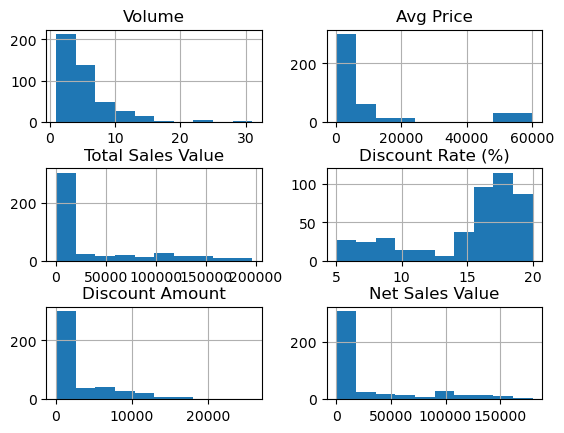

In [5]:
plt.figure(figsize=(15,5))
plt.tight_layout()
dataset.hist()
plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.show()


# Histogram

<Axes: xlabel='Discount Amount', ylabel='Count'>

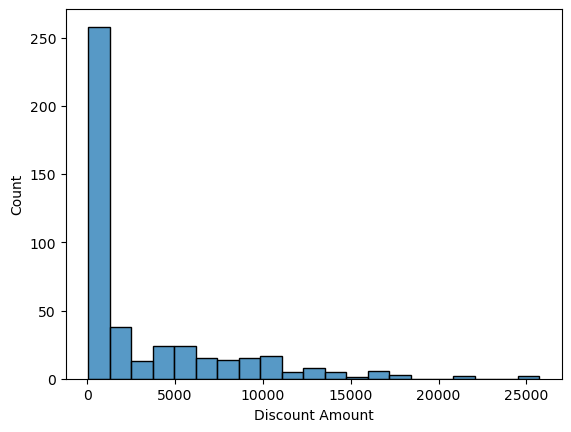

In [6]:
sns.histplot(dataset["Discount Amount"])

# Box plot

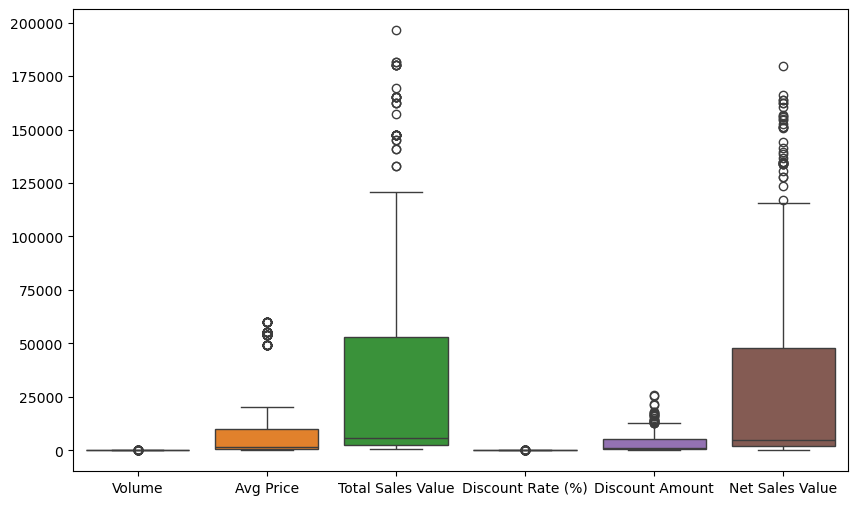

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset)
plt.title=("Sales Data With Discount")


## Bar Chart

Text(0, 0.5, 'Avg Price')

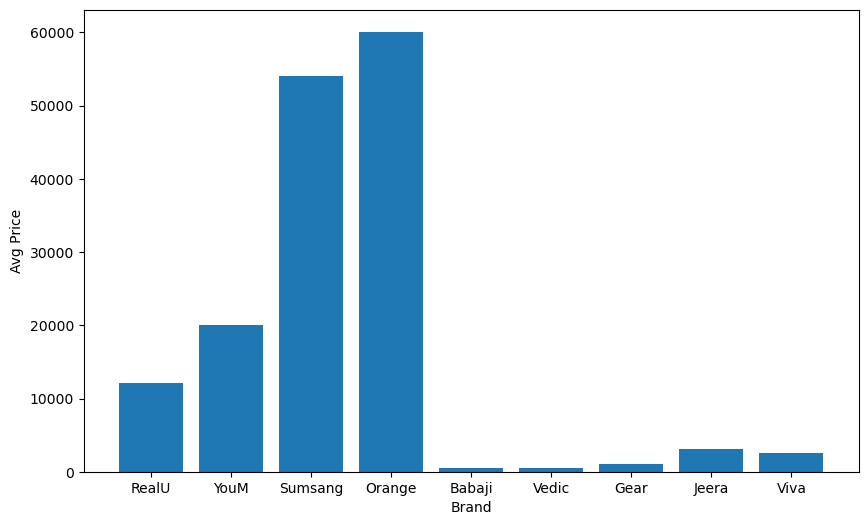

In [8]:
plt.figure(figsize=(10,6))
plt.bar(dataset["Brand"],dataset["Avg Price"])
plt.xlabel("Brand")
plt.ylabel("Avg Price")


# 

Text(0, 0.5, 'Volume')

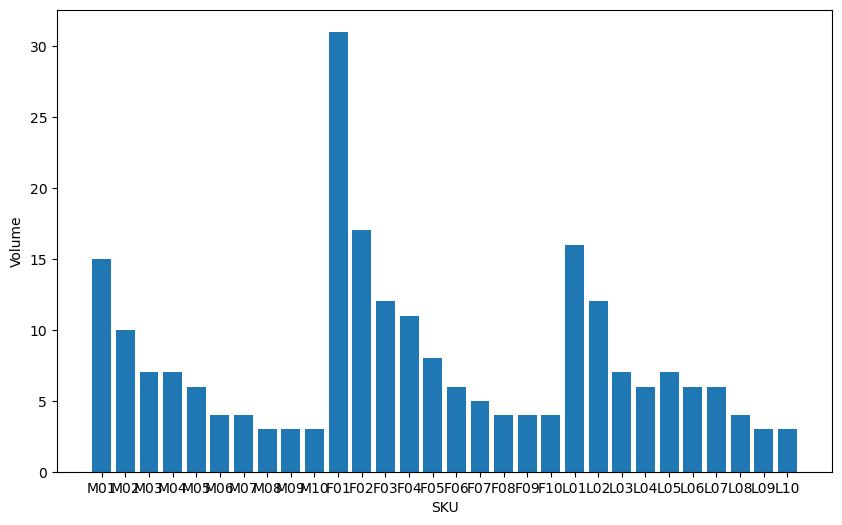

In [9]:
plt.figure(figsize=(10,6))
plt.bar(dataset["SKU"],dataset["Volume"])
plt.xlabel("SKU")
plt.ylabel("Volume")

# standalization of numerical variable


In [10]:
dataset.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
numerical_cols=['Volume','Avg Price']
Scaler=StandardScaler()
dataset[numerical_cols]=Scaler.fit_transform(dataset[numerical_cols])

print("Mean after Standardization:")
print(dataset[numerical_cols].mean())

print("standard deviation after Standardization:")
print(dataset[numerical_cols].std())


Mean after Standardization:
Volume       6.118562e-17
Avg Price    3.157968e-17
dtype: float64
standard deviation after Standardization:
Volume       1.001113
Avg Price    1.001113
dtype: float64


# Dummies


In [13]:
dataset=pd.get_dummies(dataset,columns=['Day'],dtype=int)
dataset

,Date,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,01-04-2021,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,181500,11.654820,21153.498820,160346.501180,0,0,0,0,1,0,0
1,01-04-2021,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,101000,11.560498,11676.102961,89323.897039,0,0,0,0,1,0,0
2,01-04-2021,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,112700,9.456886,10657.910157,102042.089843,0,0,0,0,1,0,0
3,01-04-2021,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,120600,6.935385,8364.074702,112235.925298,0,0,0,0,1,0,0
4,01-04-2021,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,24300,17.995663,4372.946230,19927.053770,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,2600,15.475687,402.367873,2197.632127,0,0,0,0,1,0,0
446,15-04-2021,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,15600,17.057027,2660.896242,12939.103758,0,0,0,0,1,0,0
447,15-04-2021,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,3200,18.965550,606.897606,2593.102394,0,0,0,0,1,0,0
448,15-04-2021,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,5700,16.793014,957.201826,4742.798174,0,0,0,0,1,0,0


In [14]:
dataset.dtypes

Date                  object
SKU                   object
City                  object
Volume               float64
BU                    object
Brand                 object
Model                 object
Avg Price            float64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
Day_Friday             int64
Day_Monday             int64
Day_Saturday           int64
Day_Sunday             int64
Day_Thursday           int64
Day_Tuesday            int64
Day_Wednesday          int64
dtype: object

# Conclusion

key findings

1. Identified numerical columns in the dataset.
2. Calculated the mean, median, mode,
3. Provided a brief interpretation of these statistics.

Data Visualisation

1. Histogram 

By using the entire dataset in the histogram,captured the distribution of all numerical fields across different dimensions. This approach helps in visualizing  and  key metrics like total sales value, discount rates, and net sales values, providing a spread and identifying any skewed distributions.



2. Box Plot 

The box plot for the entire dataset allows you to detect outliers and understand the range of key metrics across the data. Outliers  represent unusual sales spikes or steep discounts, 


3. Bar Chart (Brand and Avg Columns):

By focusing on the Brand and Avg columns, the bar chart helps compare average sales values or average prices across different brands. This visualization highlights brand performance, making it easier to identify top-selling or premium-priced brands.